In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
insurance.shape

(1338, 7)

In [16]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [17]:
insurance.isnull().values.any()

False

In [18]:
insurance.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Text(0.9, 53.13, 'Max')

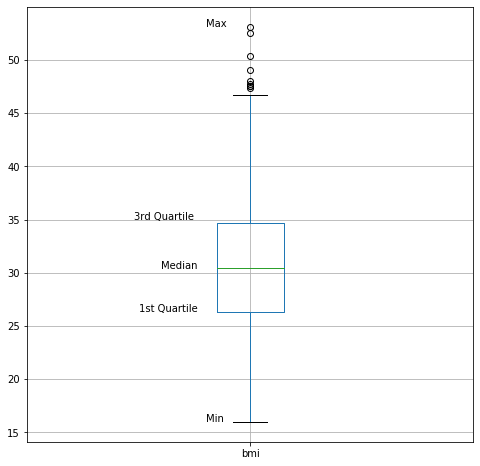

In [19]:
# Create boxplot for column="bmi"
insurance.boxplot(column="bmi",return_type='axes',figsize=(8,8))
plt.text(x=0.74, y=35.00, s="3rd Quartile")
plt.text(x=0.8, y=30.40, s="Median")
plt.text(x=0.75, y=26.30, s="1st Quartile")
plt.text(x=0.9, y=15.96, s="Min")
plt.text(x=0.9, y=53.13, s="Max")
#plt.text(x=0.7, y=107.5, s="IQR", rotation=90, size=25)

In [ ]:
#No extreme values/outliers in 'bmi'. Data was equally distributed.

Text(0.9, 64, 'Max')

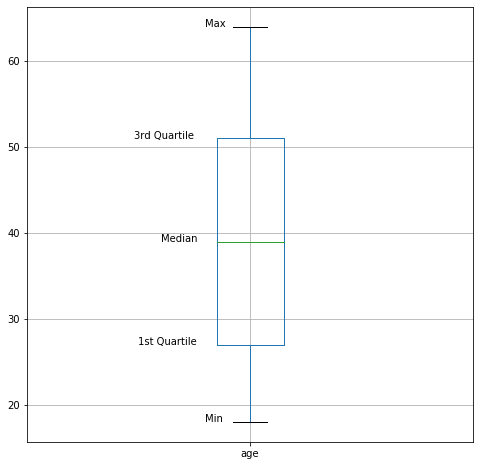

In [20]:
# Create boxplot for column="age"
insurance.boxplot(column="age",return_type='axes',figsize=(8,8))
plt.text(x=0.74, y=51.00, s="3rd Quartile")
plt.text(x=0.8, y=39, s="Median")
plt.text(x=0.75, y=27, s="1st Quartile")
plt.text(x=0.9, y=18, s="Min")
plt.text(x=0.9, y=64, s="Max")
#plt.text(x=0.7, y=107.5, s="IQR", rotation=90, size=25)

In [ ]:
#No extreme values/outliers in 'age'. Data was equally distributed.

Text(0.9, 63770.42801, 'Max')

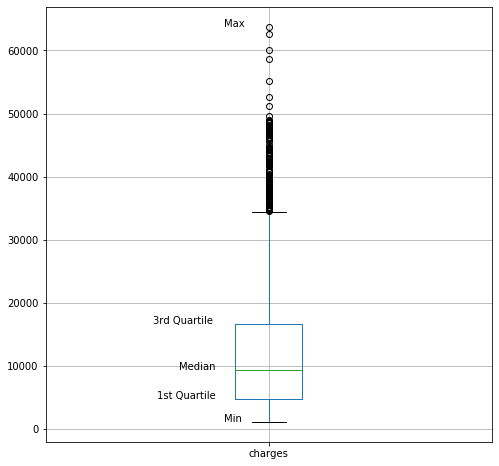

In [21]:
# Create boxplot for column="charges"
insurance.boxplot(column="charges",return_type='axes',figsize=(8,8))
plt.text(x=0.74, y=16639.912515, s="3rd Quartile")
plt.text(x=0.8, y=9382.033, s="Median")
plt.text(x=0.75, y=4740.28715, s="1st Quartile")
plt.text(x=0.9, y=1121.8739, s="Min")
plt.text(x=0.9, y=63770.42801, s="Max")
#plt.text(x=0.7, y=107.5, s="IQR", rotation=90, size=25)

In [ ]:
#There are extreme values/outliers in 'charges'. Data was positively skewed.

In [22]:
insurance.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

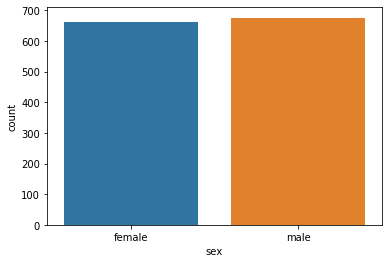

In [25]:
#categorical data

sns.countplot(x="sex", data=insurance)

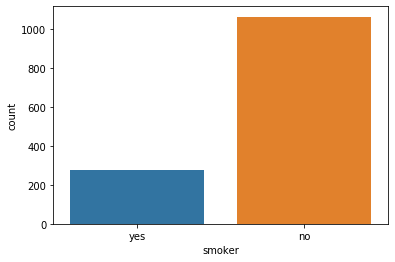

In [26]:
sns.countplot(x="smoker", data=insurance)

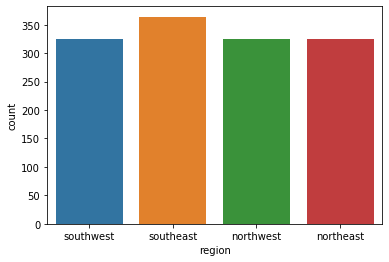

In [27]:
sns.countplot(x="region", data=insurance)

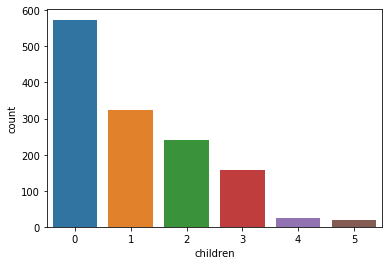

In [28]:
sns.countplot(x="children", data=insurance)

In [38]:
#convert categorical to numeric

insurance["sex"] = insurance["sex"].astype('category')
insurance["smoker"] = insurance["smoker"].astype('category')
insurance["region"] = insurance["region"].astype('category')

In [39]:
insurance.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

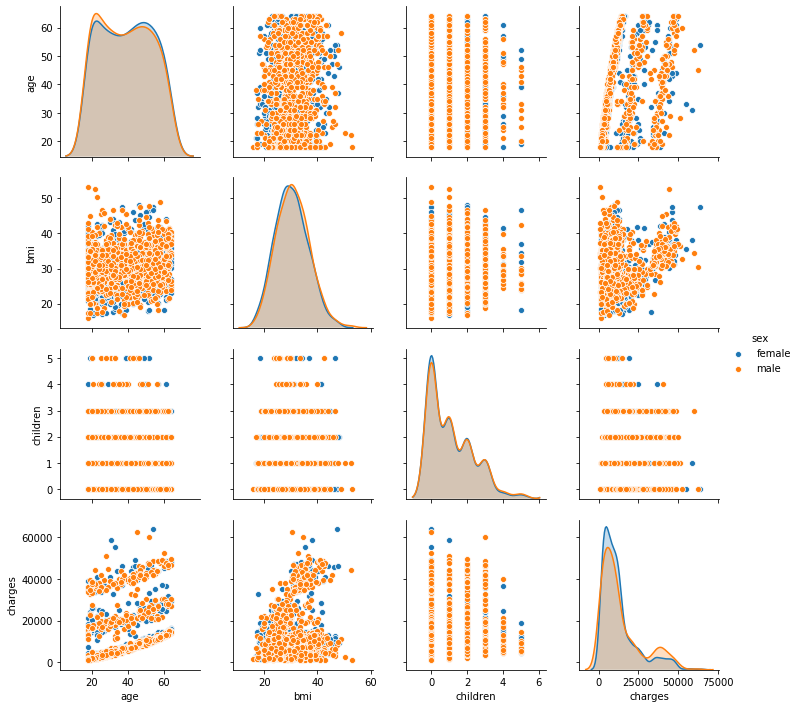

In [40]:
#Pairplot

sns.pairplot(insurance, hue = "sex")

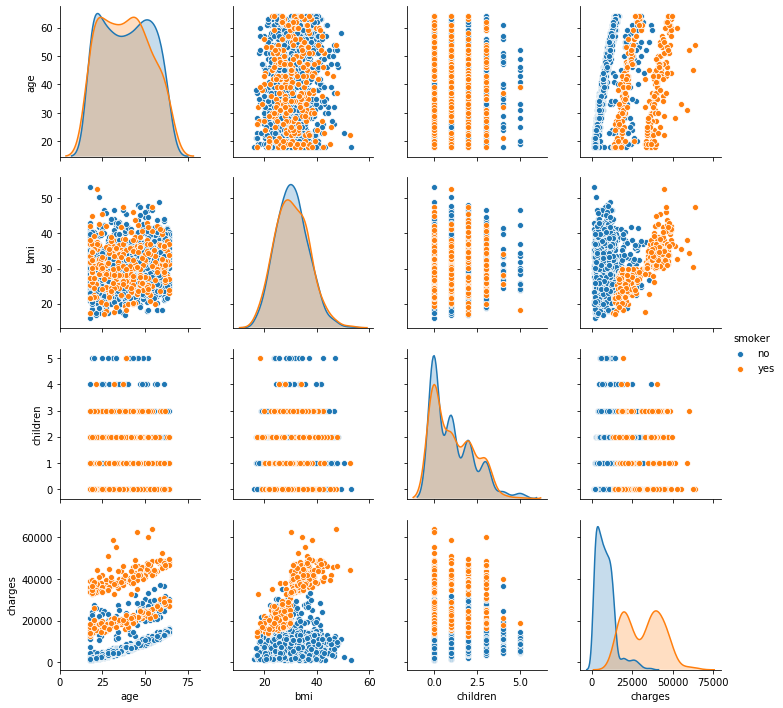

In [41]:
sns.pairplot(insurance, hue = "smoker")

In [ ]:
#Do charges of people who smoke differ significantly  from the people who don't?
Yes, we can say that on the basis of the above pairplot distribution of charges with hue as 'smoker'

In [ ]:
#Does bmi of males differ significantly from that of  females?
No, we can say that on the basis of the above pairplot distribution of bmi with hue as 'sex'

In [101]:
#Is the proportion of smokers significantly different  in different genders? Yes. As per the data below, count of smokers is more among males.


In [106]:
insurance_smokers = insurance.copy()
insurance_smokers = insurance_smokers[insurance_smokers['smoker'] == 'yes']
insurance_smokers.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


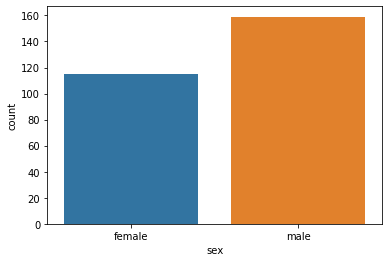

In [105]:
sns.countplot(x="sex", data=insurance_smokers)

In [103]:
# Is the distribution of bmi across women with no  children, one child and two children, the same ? No.Same for women with no children or 1 child. Different for women with 2 children as per the data below.

In [95]:
insurance_1 = insurance.copy()

In [96]:
insurance_1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [97]:
insurance_1 = insurance_1[insurance_1['sex'] == 'female']

In [98]:
insurance_1 = insurance_1.loc[insurance_1['children'] < 3]

In [99]:
insurance_1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510


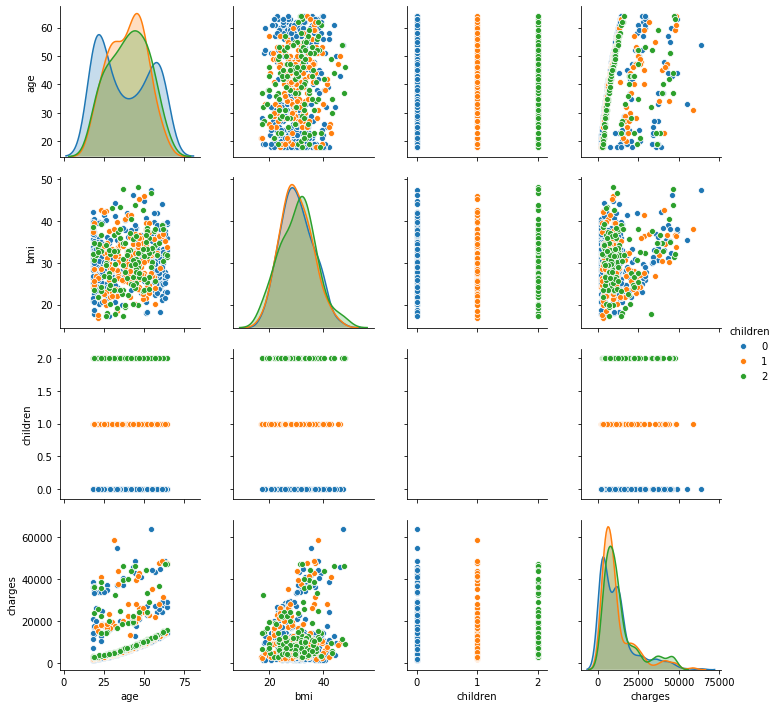

In [100]:
sns.pairplot(insurance_1, hue = "children")